In [2]:
from IPython.display import Markdown,display

display(Markdown("header.md"))

<h1 align="center">SWMAL</h1>
<h3 align="center">Assignment O3</h3>
<h3 align="center">Group 24</h3>
<h5 align="center">November 17 2023</h5>


|Name|Student Number |
|:---|:---|
|Sean Harboe Bateman|200203025|
|Martin Stokholm Lauridsen|201908195|
|Christain Duwe Konnerup|202010016|

## Convolutional Neural Networks (CNNs)
A CNN is a neural network model that is specialized in working with images or videos in a 2D dimension. A CNN is used for processing the images or videos in a grid. So in general CNN is used for series data and pattern recognition.

To make a CNN there has to be different layers, these layers is the foundation for creating a functional CNN model. The layers also called convolutional layers, these layers is what gives the entire networks it's name. One of the important terms when talking about CNN's is filters. Filters is what gives a CNN the functionality for pattern recognition.

`Convolutional layers` these layers are what applies the different filters to the different neurons data. These layers are linear operations that can apply 1 or more filters to a neuron at once, so the different neurons have different biases. Applying a convolutional layer to neuron will multiply the pixels from the neuron data with the bias from all the filters. After applying the filters the sum of region that the filter is applied to is made. When this has happened to all the regions, there will automatically generate a new matrix where every region is made of a sum. This new matrix is used by the network to learn the different features that are in the dataset. These layers can help determine a pattern in the dataset.

`Fully Connected layers` is a combination multiple convolutional and pooling layers. A fully connected layer is a true copy of a real neural network, where every neuron from a previous layer is connected to every neuron in a new layer.

`Pooling layers` is used to reduce the image into smaller regions. This is done by segmenting the image into groups of pixels. There is different ways of doing pooling. There is max pooling which takes the max value from a group of the neighbouring regions pixels and inputs it into the feature map instead of its own value. The other pooling method is called average pooling. When using average pooling it takes the average value of all the regions in the local region it is in. The reason for using pooling is to find the most active regions of pixels and shrink down the dimensions.

`Multiple channels` is often used when working with processing of images or videos. Multiple channels allow the CNN to have different channels for the different color spectrum's. The multiple channels can also be used to create outlines on the different images. Each convolutional filter is applied to every multiple channel independently.

`Activation Functions` is used to teach the model the complex relations between all the features in the data used. Activation functions is non-linear. Some examples on activation functions would be `Relu` or `softmax`.

`Generlization` is used to ensure a models performance with unseen data, so that it does not matter how big the dataset is the model should still be able to perform somewhat decent. We used a stratified k-fold to make sure we had cross-validation on the dataset.

`Learning Curve` can be seen in the plots we have made that illustrates the training loss and accuracy from the different iterations. Training loss measures the performance of the model while doing training. It is possible to see that over time that the training loss gets smaller and the prediction value gets closer to the actual value the longer it trains. The same happens to the accuracy, from start to finish its possible to see it grow closer to a score of 1.

`Code Setup`
- Import libraries needed
- Get data from mnist
- Setup train and test data with reshaping
- Create CNN model
- Initial setup for stratified k-fold
- Setup array to store test accuracy
- For loop that creates the model fits the model
- Plotting the training loss and accuracy
- Printing average score


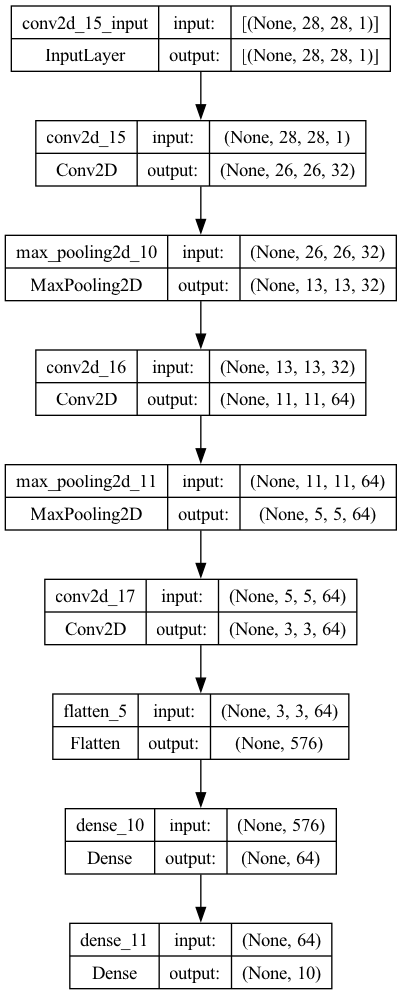

`Testing different epochs` we tried a lot of different combinations of epochs, folds and some different layers. however the best score was while using 6 folds and 20 epochs, and the final average score we ended up getting is `0.9927`

313/313 [==============================] - 1s 3ms/step - loss: 0.0445 - accuracy: 0.9894
Test average accuracy: 0.9894000291824341


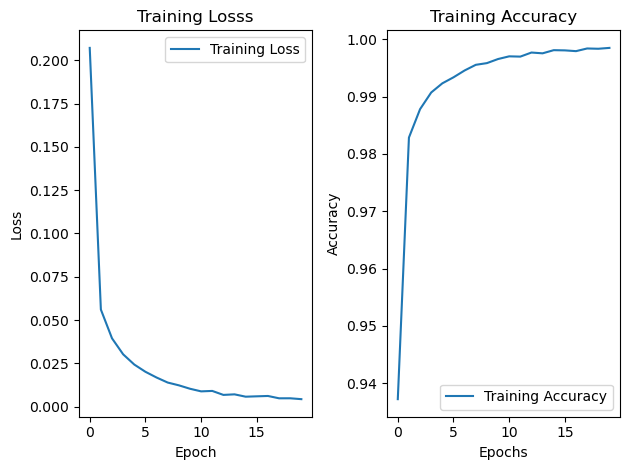

In [3]:
import keras
from keras.utils import plot_model
import numpy as np
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

(x_train, y_train ), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape((-1,28,28,1)).astype('float32') / 255.0
x_test = x_test.reshape((-1,28,28,1)).astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

def create():
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dense(10, activation='softmax'))

    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    return model

folds = 6
kfold = StratifiedKFold(n_splits=folds, shuffle=True, random_state=50)
test_accuracy = []

training_loss = []
training_accuracy = []

for train, val in kfold.split(x_train,y_train.argmax(1)):

    model = create()

    x_train_kfold, x_val_kfold = x_train[train], x_train[val]
    y_train_kfold, y_val_kfold = y_train[train], y_train[val]

    epoch_loss = []
    epoch_accuracy = []

    for epochs in range(20):
        modelhis = model.fit(x_train_kfold, y_train_kfold, epochs=1, batch_size=64, verbose=0)

        epoch_loss.append(modelhis.history['loss'][0])
        epoch_accuracy.append(modelhis.history['accuracy'][0])

    training_loss.append(epoch_loss)
    training_accuracy.append(epoch_accuracy)

    test_loss, test_accuracy = model.evaluate(x_test,y_test)

avg_accuracy = np.mean(test_accuracy)
print(f'Test average accuracy: {avg_accuracy}')

plt.subplot(1, 2, 1)
plt.plot(np.mean(training_loss, axis=0), label='Training Loss')
plt.title('Training Losss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(np.mean(training_accuracy, axis=0), label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


`Conlusion`
We have worked with CNN's and trained a model in processing images. Throughout the exercise we have tried a lot of different methods of doing processing on images using CNN's. We ended on the final version of our CNN which can maintain a high accuracy when using the MNIST dataset. We have tried different setup of layers, epochs and folds. The final result gave an accuracy of `0.9927`.


# SWMAL Exercise

## Generalization Error

In this exercise we are going to explain important overall concepts in training. 

First we look Figure 5.3 from Deep Learning (Ian Goodfellow, et. al. [DL]).

<img src="https://itundervisning.ase.au.dk/SWMAL/L08/Figs/dl_generalization_error.png" alt="WARNING: could not get image from server." style="height:500px">

The figure shows the typical relationship between the error and the capacity, where the test error and generelization error behave differently.The left side of the plot shows the underfitting regime where both errors are very high. Following an increase in capacity the training error gets lower. Meanwhile the gap between the training error and the generalization error gets increased. and then we are in the overfitting regime. Then the capacity is too large.  

### Qa) On Generalization Error

Explanation of concepts in the figure above:

#### Training error
The training error is the blue line in graph and describes the error in relation to the capacity of the training model as a percentage. The training error indicates how well the model understands patterns in the training data, where a low training error indicates that the model has a good understanding of the training data.

#### Generalization error
The green line on the graph is the generalization error and describes the error in the training model when it is tested on new data. The generalization error indicates how well the model can predict new data, where a low generalization error indicates that the model can predict new data well.

#### Underfitting
When the capacity of the model is too low, the model will not be able to understand the patterns in the training data. This will result in a high training error and a high generalization error. This is called underfitting and can be corrected by increasing the capacity of the model.

#### Overfitting
When the capacity of the model is too high, the model will be able to understand the patterns in the training data very well. This will result in a low training error and a high generalization error. This is called overfitting and can be corrected by decreasing the capacity of the model.

#### Generalization gap
The generalization gap is the vertical difference between the training error and the generalization error. The generalization gap is high when the model is overfitting and low when the model is underfitting.

#### Optimal capacity 
When fitting the model we want to find the optimal capacity where the model can recoqnize patterns in the training set that can be used on new data but without being too specific and picking up noise in the training data. This is the point where the generalization error is lowest.


### Qb A MSE-Epoch/Error Plot

Now we are taking a look at the SGD model for fitting polynomial, that is _polynomial regression_ which is similar to the Géron one, described in [HOML] ("Polynomial Regression" + "Learning Curves"). 

#### Part 1
So as we've seen before there is a function for GenerateData that seed random data points for and also adds some noise. Then the data is split into the training and validation sets.

In the pipeline we again use the polynominial feature but with a 90 degree, and no bias in order to get a model with very high capacity. The second preprocessor is the standard scaler which standardizes the features in our data set. By removing the mean and centerring the feautre distribution around 0 and scaling the variance to 1.

lastly the poly_scaler is transformed into the training and validation sets.

X_train.shape= (25, 1)
X_val  .shape= (25, 1)
y_train.shape= (25,)
y_val  .shape= (25,)


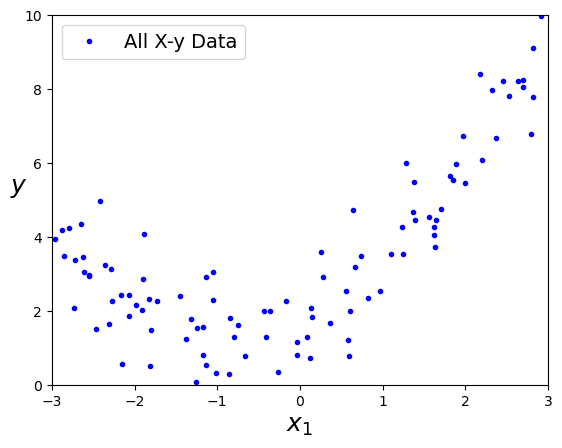

OK


In [4]:
# Run code: Qb(part I)
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)

def GenerateData():
    m = 100
    X = 6 * np.random.rand(m, 1) - 3
    y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)
    return X, y

X, y = GenerateData()
X_train, X_val, y_train, y_val = \
    train_test_split( \
        X[:50], y[:50].ravel(), \
        test_size=0.5, \
        random_state=10)

print("X_train.shape=",X_train.shape)
print("X_val  .shape=",X_val.shape)
print("y_train.shape=",y_train.shape)
print("y_val  .shape=",y_val.shape)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled   = poly_scaler.transform(X_val)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
plt.plot(X, y, "b.", label="All X-y Data")
plt.xlabel("$x_1$", fontsize=18, )
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

print('OK')      

#### Part 2

First thing is a function Train with the parameters X_train, y_train, X_val, y_val, n_epochs and verbose. The function is used to train the model and return the training and validation errors. The errors are saved in arrays. 
The Train function then uses the SGDRegressor to fit the model to the training data. It runs for 1 iteration with constant as the learning rate.
 
The model is then used to predict the training and validation sets.
The mean squared error is then calculated for both the training and validation sets. 
The errors are then saved in the arrays train_errors and val_errors. 
The function then returns the errors arrays.


In [5]:
# Run code: Qb(part II)

def Train(X_train, y_train, X_val, y_val, n_epochs, verbose=False):
    print("Training...n_epochs=",n_epochs)
    
    train_errors, val_errors = [], []
    
    sgd_reg = SGDRegressor(max_iter=1,
                           penalty=None,
                           eta0=0.0005,
                           warm_start=True,
                           early_stopping=False,
                           learning_rate="constant",
                           # Had to change this to 0 instead of "inf" to fix the error 
                           tol=-float(0), 
                           random_state=42)

    for epoch in range(n_epochs):
        
        sgd_reg.fit(X_train, y_train)
        
        y_train_predict = sgd_reg.predict(X_train)
        y_val_predict   = sgd_reg.predict(X_val)

        mse_train=mean_squared_error(y_train, y_train_predict)
        mse_val  =mean_squared_error(y_val  , y_val_predict)

        train_errors.append(mse_train)
        val_errors  .append(mse_val)
        if verbose:
            print(f"  epoch={epoch:4d}, mse_train={mse_train:4.2f}, mse_val={mse_val:4.2f}")

    return train_errors, val_errors

n_epochs = 500
train_errors, val_errors = Train(X_train_poly_scaled, y_train, X_val_poly_scaled, y_val, n_epochs, True)

print('OK')

Training...n_epochs= 500
  epoch=   0, mse_train=11.85, mse_val=14.58
  epoch=   1, mse_train=11.51, mse_val=14.10
  epoch=   2, mse_train=11.15, mse_val=13.60
  epoch=   3, mse_train=10.81, mse_val=13.13
  epoch=   4, mse_train=10.49, mse_val=12.70
  epoch=   5, mse_train=10.18, mse_val=12.30
  epoch=   6, mse_train=9.88, mse_val=11.92
  epoch=   7, mse_train=9.60, mse_val=11.56
  epoch=   8, mse_train=9.33, mse_val=11.23
  epoch=   9, mse_train=9.07, mse_val=10.91
  epoch=  10, mse_train=8.82, mse_val=10.62
  epoch=  11, mse_train=8.59, mse_val=10.34
  epoch=  12, mse_train=8.36, mse_val=10.07
  epoch=  13, mse_train=8.14, mse_val=9.82
  epoch=  14, mse_train=7.93, mse_val=9.57
  epoch=  15, mse_train=7.72, mse_val=9.34
  epoch=  16, mse_train=7.53, mse_val=9.12
  epoch=  17, mse_train=7.34, mse_val=8.91
  epoch=  18, mse_train=7.16, mse_val=8.71
  epoch=  19, mse_train=6.98, mse_val=8.52
  epoch=  20, mse_train=6.81, mse_val=8.33
  epoch=  21, mse_train=6.65, mse_val=8.15
  epoch=  

/Users/christianduwekonnerup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/christianduwekonnerup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/christianduwekonnerup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/christianduwekonnerup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing ma

  epoch= 424, mse_train=0.56, mse_val=1.76
  epoch= 425, mse_train=0.55, mse_val=1.76
  epoch= 426, mse_train=0.55, mse_val=1.77
  epoch= 427, mse_train=0.55, mse_val=1.77
  epoch= 428, mse_train=0.55, mse_val=1.77
  epoch= 429, mse_train=0.55, mse_val=1.78
  epoch= 430, mse_train=0.55, mse_val=1.78
  epoch= 431, mse_train=0.55, mse_val=1.78
  epoch= 432, mse_train=0.55, mse_val=1.78
  epoch= 433, mse_train=0.55, mse_val=1.79
  epoch= 434, mse_train=0.55, mse_val=1.79
  epoch= 435, mse_train=0.55, mse_val=1.79
  epoch= 436, mse_train=0.55, mse_val=1.80
  epoch= 437, mse_train=0.55, mse_val=1.80
  epoch= 438, mse_train=0.55, mse_val=1.80
  epoch= 439, mse_train=0.55, mse_val=1.81
  epoch= 440, mse_train=0.55, mse_val=1.81
  epoch= 441, mse_train=0.55, mse_val=1.81
  epoch= 442, mse_train=0.55, mse_val=1.82
  epoch= 443, mse_train=0.55, mse_val=1.82
  epoch= 444, mse_train=0.55, mse_val=1.82
  epoch= 445, mse_train=0.55, mse_val=1.82
  epoch= 446, mse_train=0.55, mse_val=1.83
  epoch= 44

/Users/christianduwekonnerup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/christianduwekonnerup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/christianduwekonnerup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/christianduwekonnerup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing ma

#### Part 3

The code below is used to plot the training and validation errors. Here we can see which model is the best and this is also indicated with an annotation on the graph. This is when the RMSE is the lowest near the dotted horizontal line going parralel to the x-axis. this model will be the best model for new data.

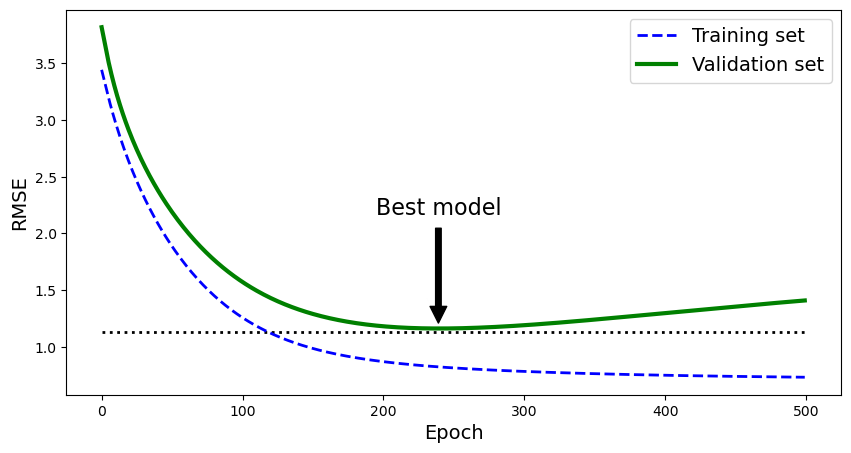

OK


In [6]:
# Run code: Qb(part III)

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.figure(figsize=(10,5))
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(train_errors), "b--", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors), "g-", linewidth=3, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

print('OK')

### Qc)  Early Stopping

Now we are going to implement early stopping in the code above.
The early stopping could be implemented as a pseudo code like this:

```python
best_val_error = float("inf")
best_epoch = None

for epoch in range(n_epochs):
    ...
   
    if val_error < best_val_error:
        best_val_error = val_error
        best_epoch = epoch
    
    if val_error > best_val_error:
        printf("early stopping")
        break
``` 

Where we stop the training when the validation error ( val_error ) is higher than the best validation error ( best_val_error ).

### Qd) Explain the Polynomial RMSE-Capacity plot

#### Why does the _training error_ keep dropping, while the _CV-error_ drops until around capacity 3, and then begin to rise again?

As the model complexity increases the model becoumes more better at fitting the training data. It continues to decrease as the model adjusts to noice in the training data.

For the validation RMSE it is initially decresing as the model is learning the patterns in the training data. When the model complexity increases the model starts to overfit the training data and the validation RMSE starts to increase. This leads to the model being worse for new unseen data becuase it becomes to specific to the training data.

#### What does the x-axis _Capacity_ and y-axis _RMSE_ represent?
The x-axis with capacity represents the complexity of the model, specifilly the degree of polynominal features of the regression model. The y-axis with RMSE represents the error of the model.

#### Increasing the model capacity. What happens when you do plots for `degrees` larger than around 10? Relate this with what you found via Qa+b in `capacity_under_overfitting.ipynb`.



Iterating...degrees= range(1, 8)
  degree=   1, rmse_training=0.48, rmse_cv=0.64
  degree=   2, rmse_training=0.17, rmse_cv=0.24
  degree=   3, rmse_training=0.11, rmse_cv=0.14
  degree=   4, rmse_training=0.11, rmse_cv=0.21
  degree=   5, rmse_training=0.10, rmse_cv=0.31
  degree=   6, rmse_training=0.10, rmse_cv=0.34
  degree=   7, rmse_training=0.10, rmse_cv=0.44


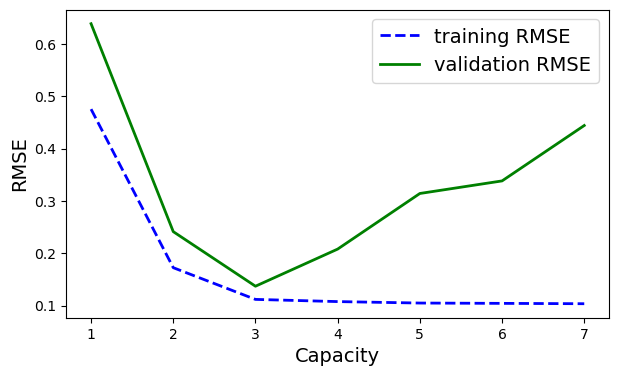

OK


In [7]:
# Run and review this code
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline

from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData():
    n_samples = 30
    #degrees = [1, 4, 15]
    degrees = range(1,8)

    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y, degrees

np.random.seed(0)
X, y, degrees  = GenerateData()

print("Iterating...degrees=",degrees)
capacities, rmses_training, rmses_validation= [], [], []
for i in range(len(degrees)):
    d=degrees[i]
    
    polynomial_features = PolynomialFeatures(degree=d, include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])
    
    Z = X[:, np.newaxis]
    pipeline.fit(Z, y)
    
    p = pipeline.predict(Z)
    train_rms = mean_squared_error(y,p)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, Z, y, scoring="neg_mean_squared_error", cv=10)
    score_mean = -scores.mean()
    
    rmse_training=sqrt(train_rms)
    rmse_validation=sqrt(score_mean)
    
    print(f"  degree={d:4d}, rmse_training={rmse_training:4.2f}, rmse_cv={rmse_validation:4.2f}")
    
    capacities      .append(d)
    rmses_training  .append(rmse_training)
    rmses_validation.append(rmse_validation)
    
plt.figure(figsize=(7,4))
plt.plot(capacities, rmses_training,  "b--", linewidth=2, label="training RMSE")
plt.plot(capacities, rmses_validation,"g-",  linewidth=2, label="validation RMSE")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Capacity", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

print('OK')

#### Increasing the model capacity. What happens when you do plots for `degrees` larger than around 10? Relate this with what you found via Qa+b in `capacity_under_overfitting.ipynb`.


Iterating...degrees= range(1, 12)
  degree=   1, rmse_training=0.48, rmse_cv=0.64
  degree=   2, rmse_training=0.17, rmse_cv=0.24
  degree=   3, rmse_training=0.11, rmse_cv=0.14
  degree=   4, rmse_training=0.11, rmse_cv=0.21
  degree=   5, rmse_training=0.10, rmse_cv=0.31
  degree=   6, rmse_training=0.10, rmse_cv=0.34
  degree=   7, rmse_training=0.10, rmse_cv=0.44
  degree=   8, rmse_training=0.10, rmse_cv=0.60
  degree=   9, rmse_training=0.10, rmse_cv=4.61
  degree=  10, rmse_training=0.10, rmse_cv=38.94
  degree=  11, rmse_training=0.10, rmse_cv=154.97


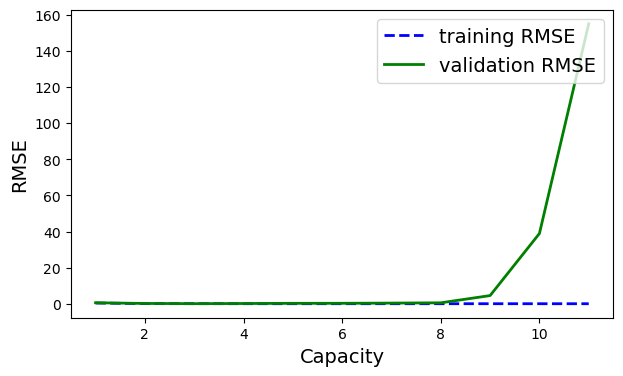

OK


In [8]:
# Run and review this code
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline

from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData():
    n_samples = 30
    #degrees = [1, 4, 15]
    degrees = range(1,12)

    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y, degrees

np.random.seed(0)
X, y, degrees  = GenerateData()

print("Iterating...degrees=",degrees)
capacities, rmses_training, rmses_validation= [], [], []
for i in range(len(degrees)):
    d=degrees[i]
    
    polynomial_features = PolynomialFeatures(degree=d, include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])
    
    Z = X[:, np.newaxis]
    pipeline.fit(Z, y)
    
    p = pipeline.predict(Z)
    train_rms = mean_squared_error(y,p)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, Z, y, scoring="neg_mean_squared_error", cv=10)
    score_mean = -scores.mean()
    
    rmse_training=sqrt(train_rms)
    rmse_validation=sqrt(score_mean)
    
    print(f"  degree={d:4d}, rmse_training={rmse_training:4.2f}, rmse_cv={rmse_validation:4.2f}")
    
    capacities      .append(d)
    rmses_training  .append(rmse_training)
    rmses_validation.append(rmse_validation)
    
plt.figure(figsize=(7,4))
plt.plot(capacities, rmses_training,  "b--", linewidth=2, label="training RMSE")
plt.plot(capacities, rmses_validation,"g-",  linewidth=2, label="validation RMSE")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Capacity", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

print('OK')

After increacing the capacity we now see that the RMSE of the validation goes exponetial and at 10 capacity it is grown very much. This is because the model is overfitting the training data and is not able to predict new data. This is also what we found in Qa+b in `capacity_under_overfitting.ipynb` where we saw that the model was overfitting the training data and was not able to predict new data when degress was too high.

# SWMAL Exercise

## Model capacity and under/overfitting

### Qa) Explain the polynomial fitting via code review

In the code below the underfitting and overfitting concepts are demonstrated in polynomial regression.

The first function definition `true_fun` is the true function we want to fit, and the second function `GenerateData` generates the data samples from the true function, with some added noise. 

Next part that is defined is the degress which are used to fit the polynomial regression model.  

The next part is the for loop, where we fit the polynomial regression models of different degrees (1, 4, 15) to the data, and evaluates their performance using cross-validation. 

The true function is a cosine curve with added random noise. The code uses scikit-learn's Pipeline to create a polynomial regression model and calculates mean squared error scores for each degree. The results show how model complexity (degree) affects performance, highlighting the trade-off between underfitting and overfitting. 

Finally the loop ends with prints of the cross-validation sub-scores for each fold.

Iterating...degrees= [1, 4, 15]
  degree=   1, score_mean=-0.41,  PolynomialFeatures(degree=1, include_bias=False)
    CV sub-scores:  mean = -0.41,  std = 0.43
      CV fold 0  =>  score = -1.2
      CV fold 1  =>  score = -0.2
      CV fold 2  =>  score = -0.044
      CV fold 3  =>  score = -0.36
      CV fold 4  =>  score = -0.28
      CV fold 5  =>  score = -0.3
      CV fold 6  =>  score = -0.18
      CV fold 7  =>  score = -0.0086
      CV fold 8  =>  score = -0.25
      CV fold 9  =>  score = -1.3
  degree=   4, score_mean=-0.04,  PolynomialFeatures(degree=4, include_bias=False)
    CV sub-scores:  mean = -0.043,  std = 0.071
      CV fold 0  =>  score = -0.25
      CV fold 1  =>  score = -0.042
      CV fold 2  =>  score = -0.027
      CV fold 3  =>  score = -0.029
      CV fold 4  =>  score = -0.0049
      CV fold 5  =>  score = -0.0049
      CV fold 6  =>  score = -0.019
      CV fold 7  =>  score = -0.038
      CV fold 8  =>  score = -0.012
      CV fold 9  =>  score = -0.00

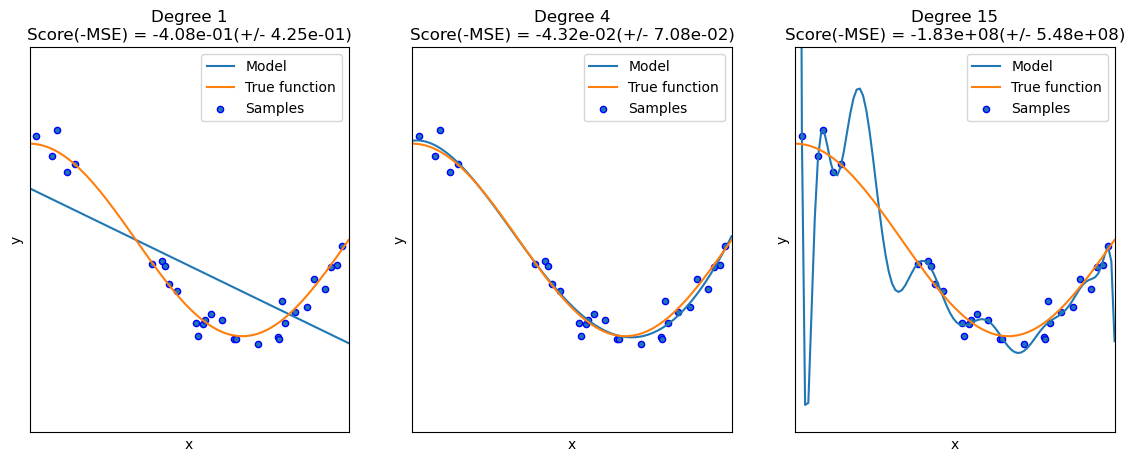

OK


In [9]:
# NOTE: code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData(n_samples = 30):
    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y

np.random.seed(0)

X, y = GenerateData()
degrees = [1, 4, 15]
    
print("Iterating...degrees=",degrees)
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)
    
    score_mean = scores.mean()
    print(f"  degree={degrees[i]:4d}, score_mean={score_mean:4.2f},  {polynomial_features}")   

    X_test = np.linspace(0, 1, 100)
    y_pred = pipeline.predict(X_test[:, np.newaxis])
    
    # Plotting details
    plt.plot(X_test, y_pred          , label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nScore(-MSE) = {:.2e}(+/- {:.2e})".format(degrees[i], scores.mean(), scores.std()))
    
    # CEF: loop added, prints each score per CV-fold. 
    #      NOTICE the sub-means when degree=15!
    print(f"    CV sub-scores:  mean = {scores.mean():.2},  std = {scores.std():.2}")
    for i in range(len(scores)):
        print(f"      CV fold {i}  =>  score = {scores[i]:.2}")
        
plt.show()
print('OK')

### Qb) Explain the capacity and under/overfitting concept

A low degres polynomial regression model will underfit the data, because it will not be able to recoqnize the patternz in the data. This gives a result with a high bias and low variance. We notice this in the plot also where the model is not able to fit the data well and is way off. 

With the medium degress we get a more balanced fit of the data, and the model is able to recoqnize the patternz in the data. This gives a result with a low bias and low variance. We notice this in the plot also where the model is able to fit the data well and almost follows the true function.

Lastly we have a high degree where overfitting is happening. The model is able to fit the data very well, but it is not able to recoqnize the patternz in the data. This gives a result with a low bias and high variance. We notice this in the plot also where the model is able to fit the data very well, but is not able to follow the true function. The model is overfitting the data and is not able to generalize well, this is noticable with how the model correlates very closely with the samples and tries to hit/touch all of them. 

### Qc) Score method

The scoring method `neg_mean_squared_error` is the MSE but negated so instead of a high score being good, a low score is good.  

In the `MSE` the `J-function` is going from bein a cost function to be more of a score function, because we want to maximize some measure of model performance.

If we set it to `mean_squared_error` then it raises an exception.  

![exeception.png](exeception.png)


This happens because the MSE has minimum theoretical score of 0. 
The highest score is without any upper bound so can grow very large when the actual values are far from the predictions.

The high degree model (15) has a big negative value, because the samples are very far form the predictions. Given that it is a negative value, it is a very good score that indicate the model is overfitting the data.

# SWMAL Exercise


## Hyperparameters and Gridsearch 


### Qa Explain GridSearchCV

There are two code cells below: 1) function setup, 2) the actual grid-search.

Review the code cells and write a __short__ summary. Mainly focus on __cell 2__, but dig into cell 1 if you find it interesting (notice the use of local-function, a nifty feature in python).
  
In detail, examine the lines:  
  
```python
grid_tuned = GridSearchCV(model, tuning_parameters, ..
grid_tuned.fit(X_train, y_train)
..
FullReport(grid_tuned , X_test, y_test, time_gridsearch)
```
and write a short description of how the `GridSeachCV` works: explain how the search parameter set is created and the overall search mechanism is functioning (without going into too much detail).

What role does the parameter `scoring='f1_micro'` play in the `GridSearchCV`, and what does `n_jobs=-1` mean? 


"Cell 1: function setup
This cell contains functions and setup related to training and evaluating machine learning models. Key points include:

The SearchReport function generates a report based on the results of grid or randomized search. It includes a GetBestModelCTOR function that constructs a string representation of the best model and its parameters.

The ClassificationReport function generates a detailed classification report based on the trained model and test data.

The FullReport function combines the results of SearchReport and ClassificationReport and prints them.

The LoadAndSetupData function loads and sets up the dataset based on the specified mode.

There is a TryKerasImport function that checks if the import of Keras or TensorFlow.keras is successful.

Cell 2: the actual grid-search
This cell performs the actual grid search:

Data is loaded using the LoadAndSetupData function for the 'iris' mode.

An SVM model (svm.SVC) is defined with a fixed gamma and a set of tuning parameters (tuning_parameters) to be searched through. It also specifies the number of cross-validation folds (CV), verbose level (VERBOSE), and n_jobs=-1 to utilize all available processors.

A GridSearchCV object (grid_tuned) is created with the model, tuning parameters, cross-validation strategy, scoring metric ('f1_micro'), verbose level, and the number of parallel jobs.

The grid search is executed by calling the fit method on grid_tuned with the training data (X_train and y_train).

Results are reported using the FullReport function, which prints the best parameters, best score, and generates a classification report for the test dataset.

In summary, the GridSearchCV is used to systematically search through a specified parameter grid for the best hyperparameters of a given model. The parameter set is created based on the provided tuning parameters. The scoring='f1_micro' parameter indicates that the model's performance is evaluated using the F1 micro score. The n_jobs=-1 parameter means that the search is performed in parallel using all available processors, which can significantly speed up the process."
Answered by chatGPT

In [10]:
# TODO: Qa, code review..cell 1) function setup

from time import time
import numpy as np
import sys

from sklearn import svm
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn import datasets

import sys,os
sys.path.append(os.path.expanduser('../'))
from libitmal import dataloaders as itmaldataloaders # Needed for load of iris, moon and mnist

currmode="N/A" # GLOBAL var!

def SearchReport(model): 
    
    def GetBestModelCTOR(model, best_params):
        def GetParams(best_params):
            ret_str=""          
            for key in sorted(best_params):
                value = best_params[key]
                temp_str = "'" if str(type(value))=="<class 'str'>" else ""
                if len(ret_str)>0:
                    ret_str += ','
                ret_str += f'{key}={temp_str}{value}{temp_str}'  
            return ret_str          
        try:
            param_str = GetParams(best_params)
            return type(model).__name__ + '(' + param_str + ')' 
        except:
            return "N/A(1)"
        
    print("\nBest model set found on train set:")
    print()
    print(f"\tbest parameters={model.best_params_}")
    print(f"\tbest '{model.scoring}' score={model.best_score_}")
    print(f"\tbest index={model.best_index_}")
    print()
    print(f"Best estimator CTOR:")
    print(f"\t{model.best_estimator_}")
    print()
    try:
        print(f"Grid scores ('{model.scoring}') on development set:")
        means = model.cv_results_['mean_test_score']
        stds  = model.cv_results_['std_test_score']
        i=0
        for mean, std, params in zip(means, stds, model.cv_results_['params']):
            print("\t[%2d]: %0.3f (+/-%0.03f) for %r" % (i, mean, std * 2, params))
            i += 1
    except:
        print("WARNING: the random search do not provide means/stds")
    
    global currmode                
    assert "f1_micro"==str(model.scoring), f"come on, we need to fix the scoring to be able to compare model-fits! Your scoreing={str(model.scoring)}...remember to add scoring='f1_micro' to the search"   
    return f"best: dat={currmode}, score={model.best_score_:0.5f}, model={GetBestModelCTOR(model.estimator,model.best_params_)}", model.best_estimator_ 

def ClassificationReport(model, X_test, y_test, target_names=None):
    assert X_test.shape[0]==y_test.shape[0]
    print("\nDetailed classification report:")
    print("\tThe model is trained on the full development set.")
    print("\tThe scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, model.predict(X_test)                 
    print(classification_report(y_true, y_pred, target_names=target_names))
    print()
    
def FullReport(model, X_test, y_test, t):
    print(f"SEARCH TIME: {t:0.2f} sec")
    beststr, bestmodel = SearchReport(model)
    ClassificationReport(model, X_test, y_test)    
    print(f"CTOR for best model: {bestmodel}\n")
    print(f"{beststr}\n")
    return beststr, bestmodel
    
def LoadAndSetupData(mode, test_size=0.3):
    assert test_size>=0.0 and test_size<=1.0
    
    def ShapeToString(Z):
        n = Z.ndim
        s = "("
        for i in range(n):
            s += f"{Z.shape[i]:5d}"
            if i+1!=n:
                s += ";"
        return s+")"

    global currmode
    currmode=mode
    print(f"DATA: {currmode}..")
    
    if mode=='moon':
        X, y = itmaldataloaders.MOON_GetDataSet(n_samples=5000, noise=0.2)
        itmaldataloaders.MOON_Plot(X, y)
    elif mode=='mnist':
        X, y = itmaldataloaders.MNIST_GetDataSet(load_mode=0)
        if X.ndim==3:
            X=np.reshape(X, (X.shape[0], -1))
    elif mode=='iris':
        X, y = itmaldataloaders.IRIS_GetDataSet()
    else:
        raise ValueError(f"could not load data for that particular mode='{mode}', only 'moon'/'mnist'/'iris' supported")
        
    print(f'  org. data:  X.shape      ={ShapeToString(X)}, y.shape      ={ShapeToString(y)}')

    assert X.ndim==2
    assert X.shape[0]==y.shape[0]
    assert y.ndim==1 or (y.ndim==2 and y.shape[1]==0)    
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=0, shuffle=True
    )
    
    print(f'  train data: X_train.shape={ShapeToString(X_train)}, y_train.shape={ShapeToString(y_train)}')
    print(f'  test data:  X_test.shape ={ShapeToString(X_test)}, y_test.shape ={ShapeToString(y_test)}')
    print()
    
    return X_train, X_test, y_train, y_test

def TryKerasImport(verbose=True):
    
    kerasok = True
    try:
        import keras as keras_try
    except:
        kerasok = False

    tensorflowkerasok = True
    try:
        import tensorflow.keras as tensorflowkeras_try
    except:
        tensorflowkerasok = False
        
    ok = kerasok or tensorflowkerasok
    
    if not ok and verbose:
        if not kerasok:
            print("WARNING: importing 'keras' failed", file=sys.stderr)
        if not tensorflowkerasok:
            print("WARNING: importing 'tensorflow.keras' failed", file=sys.stderr)

    return ok
    
print(f"OK(function setup" + ("" if TryKerasImport() else ", hope MNIST loads works because it seems you miss the installation of Keras or Tensorflow!") + ")")

OK(function setup)


In [11]:
# TODO: Qa, code review..cell 2) the actual grid-search

# Setup data
X_train, X_test, y_train, y_test = LoadAndSetupData(
    'iris')  # 'iris', 'moon', or 'mnist'

# Setup search parameters
model = svm.SVC(
    gamma=0.001
)  # NOTE: gamma="scale" does not work in older Scikit-learn frameworks,
# FIX:  replace with model = svm.SVC(gamma=0.001)

tuning_parameters = {
    'kernel': ('linear', 'rbf'), 
    'C': [0.1, 1, 10]
}

CV = 5
VERBOSE = 0

# Run GridSearchCV for the model
grid_tuned = GridSearchCV(model,
                          tuning_parameters,
                          cv=CV,
                          scoring='f1_micro',
                          verbose=VERBOSE,
                          n_jobs=-1)

start = time()
grid_tuned.fit(X_train, y_train)
t = time() - start

# Report result
b0, m0 = FullReport(grid_tuned, X_test, y_test, t)
print('OK(grid-search)')

DATA: iris..
  org. data:  X.shape      =(  150;    4), y.shape      =(  150)
  train data: X_train.shape=(  105;    4), y_train.shape=(  105)
  test data:  X_test.shape =(   45;    4), y_test.shape =(   45)
SEARCH TIME: 1.14 sec

Best model set found on train set:

	best parameters={'C': 1, 'kernel': 'linear'}
	best 'f1_micro' score=0.9714285714285715
	best index=2

Best estimator CTOR:
	SVC(C=1, gamma=0.001, kernel='linear')

Grid scores ('f1_micro') on development set:
	[ 0]: 0.962 (+/-0.093) for {'C': 0.1, 'kernel': 'linear'}
	[ 1]: 0.371 (+/-0.038) for {'C': 0.1, 'kernel': 'rbf'}
	[ 2]: 0.971 (+/-0.047) for {'C': 1, 'kernel': 'linear'}
	[ 3]: 0.695 (+/-0.047) for {'C': 1, 'kernel': 'rbf'}
	[ 4]: 0.952 (+/-0.085) for {'C': 10, 'kernel': 'linear'}
	[ 5]: 0.924 (+/-0.097) for {'C': 10, 'kernel': 'rbf'}

Detailed classification report:
	The model is trained on the full development set.
	The scores are computed on the full evaluation set.

              precision    recall  f1-score   

### Qb Hyperparameter Grid Search using an SDG classifier

The svm.SVC model has been substituted with an SGDClassifier, and the model's hyperparameters have been adjusted. A  different loss function is now employed. Additionally, there has been set a maximum number of iterations and regularization to mitigate overfitting, though it results in a less flexible model. The parameter eta0 represents the initial learning rate, and penalty determines the type of regularization.

In [12]:
from sklearn.linear_model import SGDClassifier
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html

# Setup data
X_train, X_test, y_train, y_test = LoadAndSetupData(
    'iris')  # 'iris', 'moon', or 'mnist'

# Setup search parameters
model = SGDClassifier(
    loss='hinge',
    random_state=42
)  

tuning_parameters = {
    'loss': ['hinge', 'squared_hinge', 'perceptron'],
    'max_iter': [300, 900, 1400],
    'alpha': [0.0001, 0.001, 0.01],
    'eta0': [0.01, 0.1],
    'penalty': ['l1', 'l2'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'power_t': [0.1, 0.5],
    'early_stopping': [False],
    'validation_fraction': [0.1, 0.2],
    'n_iter_no_change': [5, 10, 20],
}


CV = 5
VERBOSE = 0

# Run GridSearchCV for the model
grid_tuned = GridSearchCV(model,
                          tuning_parameters,
                          cv=CV,
                          scoring='f1_micro',
                          verbose=VERBOSE,
                          n_jobs=-1)

start = time()
grid_tuned.fit(X_train, y_train)
t = time() - start

# Report result
b0, m0 = FullReport(grid_tuned, X_test, y_test, t)
print('OK(grid-search)')

DATA: iris..
  org. data:  X.shape      =(  150;    4), y.shape      =(  150)
  train data: X_train.shape=(  105;    4), y_train.shape=(  105)
  test data:  X_test.shape =(   45;    4), y_test.shape =(   45)


/Users/christianduwekonnerup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/christianduwekonnerup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/christianduwekonnerup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/christianduwekonnerup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_it

SEARCH TIME: 4.50 sec

Best model set found on train set:

	best parameters={'alpha': 0.001, 'early_stopping': False, 'eta0': 0.01, 'learning_rate': 'optimal', 'loss': 'perceptron', 'max_iter': 300, 'n_iter_no_change': 20, 'penalty': 'l1', 'power_t': 0.1, 'validation_fraction': 0.1}
	best 'f1_micro' score=0.9904761904761905
	best index=1672

Best estimator CTOR:
	SGDClassifier(alpha=0.001, eta0=0.01, loss='perceptron', max_iter=300,
              n_iter_no_change=20, penalty='l1', power_t=0.1, random_state=42)

Grid scores ('f1_micro') on development set:
	[ 0]: 0.905 (+/-0.085) for {'alpha': 0.0001, 'early_stopping': False, 'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'hinge', 'max_iter': 300, 'n_iter_no_change': 5, 'penalty': 'l1', 'power_t': 0.1, 'validation_fraction': 0.1}
	[ 1]: 0.905 (+/-0.085) for {'alpha': 0.0001, 'early_stopping': False, 'eta0': 0.01, 'learning_rate': 'constant', 'loss': 'hinge', 'max_iter': 300, 'n_iter_no_change': 5, 'penalty': 'l1', 'power_t': 0.1, 'v

### Qc Hyperparameter Random  Search using an SDG classifier


The default parameters for the random search were given and put in to the code for the RandomizedSearchCV


In [13]:
from sklearn.model_selection import RandomizedSearchCV

# Setup data
X_train, X_test, y_train, y_test = LoadAndSetupData('iris')

# Setup search parameters for RandomizedSearchCV
model = SGDClassifier(loss='hinge', random_state=42)

random_tuning_parameters = {
    'loss': ['hinge', 'squared_hinge', 'perceptron'],
    'max_iter': [300, 900, 1400, 2000],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'eta0': [0.01, 0.1, 0.2],
    'penalty': ['l1', 'l2'],
    'learning_rate': ['constant', 'optimal', 'invscaling'],
    'power_t': [0.1, 0.5, 0.8],
    'early_stopping': [False],
    'validation_fraction': [0.1, 0.2, 0.3],
    'n_iter_no_change': [5, 10, 20],
}

CV = 5
VERBOSE = 0

# Run RandomizedSearchCV for the model
random_tuned = RandomizedSearchCV(
    model,
    random_tuning_parameters,
    n_iter=20,
    random_state=42,
    cv=CV,
    scoring='f1_micro',
    verbose=VERBOSE,
    n_jobs=-1
)

start_random = time()
random_tuned.fit(X_train, y_train)
t_random = time() - start_random

# Report result for RandomizedSearchCV
b_random, m_random = FullReport(random_tuned, X_test, y_test, t_random)
print('OK(randomized-search)')


DATA: iris..
  org. data:  X.shape      =(  150;    4), y.shape      =(  150)
  train data: X_train.shape=(  105;    4), y_train.shape=(  105)
  test data:  X_test.shape =(   45;    4), y_test.shape =(   45)

SEARCH TIME: 0.05 sec

Best model set found on train set:

	best parameters={'validation_fraction': 0.3, 'power_t': 0.5, 'penalty': 'l1', 'n_iter_no_change': 5, 'max_iter': 2000, 'loss': 'hinge', 'learning_rate': 'optimal', 'eta0': 0.1, 'early_stopping': False, 'alpha': 0.01}
	best 'f1_micro' score=0.9619047619047618
	best index=11

Best estimator CTOR:
	SGDClassifier(alpha=0.01, eta0=0.1, max_iter=2000, penalty='l1',
              random_state=42, validation_fraction=0.3)

Grid scores ('f1_micro') on development set:
	[ 0]: 0.619 (+/-0.301) for {'validation_fraction': 0.1, 'power_t': 0.1, 'penalty': 'l2', 'n_iter_no_change': 10, 'max_iter': 300, 'loss': 'squared_hinge', 'learning_rate': 'constant', 'eta0': 0.2, 'early_stopping': False, 'alpha': 0.01}
	[ 1]: 0.886 (+/-0.177) for {

/Users/christianduwekonnerup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/christianduwekonnerup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/christianduwekonnerup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/christianduwekonnerup/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_it

Grid search is systematic and ensures to explore all combinations and making it exhaustive but potentially computationally expensive.
Random search is more flexible, exploring a random subset of combinations, which can be advantageous when the hyperparameter space is vast.
Grid search may be computationally expensive, especially with large hyperparameter spaces.
Random search might be more time-efficient in such cases but may not guarantee finding the absolute best set of hyperparameters.

Both grid search (GridSearchCV) and random search (RandomizedSearchCV) are used with the same set of initial hyperparameter values. This allows for a direct comparison of their results, demonstrating the trade-offs between an exhaustive search and a more flexible, randomized approach.

__Result of GridSearchCV__
best: dat=iris, score=0.99048, model=SGDClassifier(alpha=0.001,early_stopping=False,eta0=0.01,learning_rate='optimal',loss='perceptron',max_iter=300,n_iter_no_change=20,penalty='l1',power_t=0.1,validation_fraction=0.1)

__Result of RandomizedSearchCV__
best: dat=iris, score=0.96190, model=SGDClassifier(alpha=0.01,early_stopping=False,eta0=0.1,learning_rate='optimal',loss='hinge',max_iter=2000,n_iter_no_change=5,penalty='l1',power_t=0.5,validation_fraction=0.3)

As the results show the GridSearchCV has the highest score of 0.99048 compared to 0.96190 thereby showing that the combination of hyperparameters found by GridSearchCV resulted in a better-performing model on th f1_micro scoring metric.

## Qd MNIST Search Quest II

For the MNIST dataset, we chose the RandomForestClassifier, which is a versatile learning model known for its effectiveness in classification tasks. We think it would be good for the complexity of the MNIST dataset by combining multiple decision trees, thereby improving overall predictive accuracy and mitigating overfitting.

The RandomForestClassifier was configured with a set of hyperparameters defined in the tuning_parameters. These parameters cover various aspects such as the number of trees (n_estimators), tree depth (max_depth), minimum samples required to split an internal node (min_samples_split), and other crucial settings.

To efficiently search through this hyperparameter space, we employed RandomizedSearchCV.

To ensure reproducibility, we set the random_state parameter, and a higher number of iterations (n_iter=100) in RandomizedSearchCV allows for an extensive exploration of hyperparameter combinations, increasing the likelihood of finding optimal settings.


In [14]:
from sklearn.ensemble import RandomForestClassifier

# Setup data
X_train, X_test, y_train, y_test = LoadAndSetupData(
    'mnist')  # 'iris', 'moon', or 'mnist'

# Setup search parameters
model = RandomForestClassifier(
    random_state=83
)  

tuning_parameters = {
    'n_estimators': [10, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced', 'balanced_subsample'],
    'max_leaf_nodes': [None, 5, 10, 20],
    'min_impurity_decrease': [0.0, 0.1, 0.2],
    'oob_score': [True, False],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True],
    'criterion': ['gini', 'entropy'],
    'warm_start': [True, False],
    'ccp_alpha': [0.0, 0.1, 0.2]
}

CV = 5
VERBOSE = 0

# Run GridSearchCV for the model
grid_tuned = RandomizedSearchCV(model, 
                                tuning_parameters, 
                                n_iter=100, 
                                random_state=69, 
                                cv=CV, 
                                scoring='f1_micro', 
                                verbose=VERBOSE, 
                                n_jobs=-1)

start = time()
grid_tuned.fit(X_train, y_train)
t = time() - start

# Report result
b0, m0 = FullReport(grid_tuned, X_test, y_test, t)
print('OK(grid-search)')


DATA: mnist..
  org. data:  X.shape      =(70000;  784), y.shape      =(70000)
  train data: X_train.shape=(49000;  784), y_train.shape=(49000)
  test data:  X_test.shape =(21000;  784), y_test.shape =(21000)


/Users/christianduwekonnerup/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:780: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn(
/Users/christianduwekonnerup/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:780: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class fre

SEARCH TIME: 366.93 sec

Best model set found on train set:

	best parameters={'warm_start': False, 'oob_score': True, 'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': None, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'entropy', 'class_weight': 'balanced', 'ccp_alpha': 0.0, 'bootstrap': True}
	best 'f1_micro' score=0.9628163265306122
	best index=80

Best estimator CTOR:
	RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=30, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=200, oob_score=True, random_state=83)

Grid scores ('f1_micro') on development set:
	[ 0]: 0.568 (+/-0.020) for {'warm_start': False, 'oob_score': False, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.2, 'max_leaf_nodes': None, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'entropy', 'class_weight': 'balanc

__Conclusion__

We made various adjustments, tweaking parameters like the number of iterations (n_iter), max-depth, min sample split, and others. Despite these changes, the accuracy score stayed close to an average of 0.96, with only a slight 0.001 difference after tuning. This hints that the dataset might not contain enough information to achieve a significantly higher accuracy score. The best result is as follows:

Best Result: Dataset=MNIST, Score=0.96553, Model=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced_subsample', criterion='entropy', max_depth=20, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=5, n_estimators=200, oob_score=False, warm_start=True).

# SWMAL Exercise

## Advanced CNN using Roboflow

### Finding a dataset
We went to roboflow and found the face detection dataset which was already labeled, then we downloaded it and created a project with YOLOv8 as the model. After that we uploaded to roboflow project.

!["Dataset.png"](Dataset.png)



### Generating the model
In roboflow we followed the step by step guide to generate the model. We used the default settings. 

!["GenerateModel.png"](GenerateModel.png)


### Training the model
After having generated the model we then trained it. This again was done following the roboflow steps. We press train with roboflow and select fast option, then the Train from previous checkpoint option. We then wait for the model to train this took around two hours.

### Training graphs

Below are pictures of the result of training. 
There is the mAP, Box loss, Class loss and object loss:
!["graphs.png"](graphs.png)

<img src="graphs.png" style="height:500px">

!["Numbers.png"](Numbers.png)

<img src="Numbers.png" style="height:500px">

### Conclussion

Precision: 92.1% 

mAP (Average of average precision metric): 87,5%

Recall (percentage of relevant labels that were correctly classified): 72.1%

Overall the precision is good in the low 90s, but the recall is not as good. This means that the model is good at finding faces, but it is not as good at finding all the faces. In terms of the train, validate and test split the dataset is not equally split in desired ratio.  
